# In Class Group Activity, Week 13, Heather Leighton-Dick

## 1. Describe KNN in your own words.

The KNN classification stands for K Nearest Neighbor, and it is a way of predicting the group of a datapoint belongs to based on its proximity to other datapoints (proximity grants the other datapoints "votes" about what group the single datapoint belongs to); KNN is based on the statement/theory "similar things exist in close proximity".

## 2. Using the KNN example from class, write a function that finds the optimal value for k. You should iterate over a range of values and return the k and the score when the accuracy score is maximized. Be sure to only use odd values.

### Note: I'm not sure how to reconcile using only odd values (for K, I assume) with what the analysis showed me, which is that the most accurate K is 38. I didn't get any errors about ties because of an even number of classes, so I seem to be in the clear. Also, I'm not sure how to work a loop about odd/even i's in the ranges into the function, since KNN is a class, not an integer.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
#copied from class document
X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardization-transforming values so mean is 0 and SD is 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(y_predict)

[0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]


In [7]:
print(knn.score(X_test,y_test))

0.7142857142857143


0.23809523809523808 for K at 38
<class 'abc.ABCMeta'>


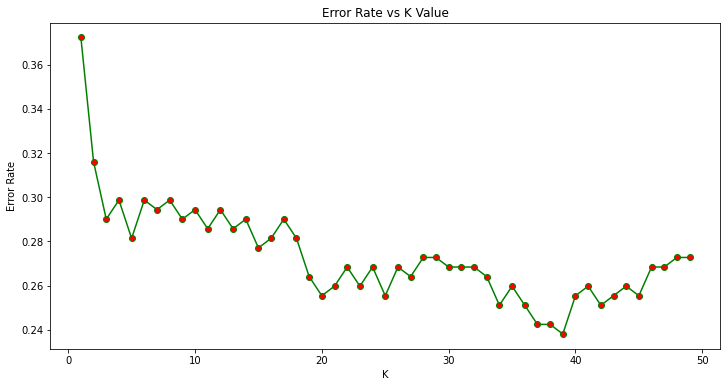

In [47]:
#graph error rate and K for values in a defined range.
#Then choose the K value that has the lowest error rate.

error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_predict != y_test))


plt.figure(figsize=(12,6))
plt.plot(range(1,50), error_rate, color="green", marker="o", markerfacecolor="red", markersize=6)
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
print(min(error_rate), "for K at", error_rate.index(min(error_rate)))

print(type(KNeighborsClassifier))

0.7619047619047619 for K at 38


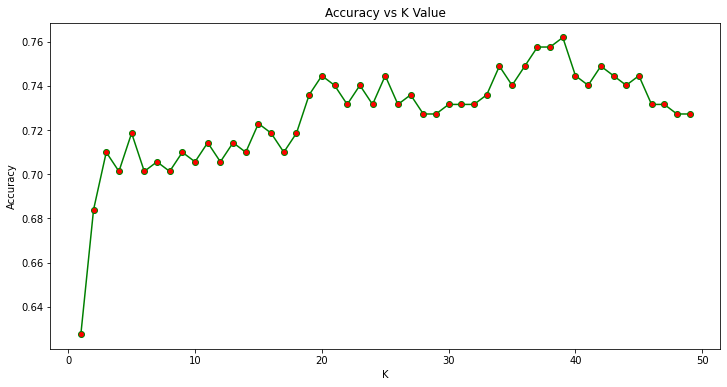

In [44]:
#function to figure out max accuracy based on k
#graph accuracy rate and K over the same range

accuracy = []

for i in range(1,50):
    neighbor = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_prediction = neighbor.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_prediction))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,50), accuracy, color="green", marker="o", markerfacecolor="red", markersize=6)
plt.title("Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
print(max(accuracy), "for K at", accuracy.index(max(accuracy)))

### As noted above, the analysis shows that 38 is the best K; it results in the lowest relative minimum error rate (about 24%) and the highest relative maximum accuracy score (about 76%). 


## 3. How did the panel influence your thoughts about working in tech, specifically work in the data realm? Discuss with your group and summarize your thoughts in under 250 words.

We all enjoyed the panel overall -- it was valuable to have perspectives from people who have different roles and have had different experiences in the tech field. We also appreciated the discussion on parlaying soft skills or background knowledge acquired through other work experiences in different fields -- it is something we struggle with, since there is a tendency to downplay work experience that isn't directly in the field of the job you're applying for. (I know I've always been taught to highlight skills directly related to the job, at the expense of  general knowledge or people skills.

The discussion gave me hope that I can make this career change and have my skills taken seriously while being able to learn and grow as a professional. It was good to have the reminder, too, that any interview is a two-way street in which I have the right to ask questions and find out more about the company. The trick is going to be figuring out which role I want to play and where my data wrangling strengths are, keeping in mind that I might enter one job but ultimately move on to other positions.